In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows',None)

## Handling Missing values

### 1. By Deleting rows and columns

In [10]:
#creating a dataframe
df=pd.DataFrame({"d1":[1,2,3,np.nan,5,6],"d2":["a","b","c","d",np.nan,"f"],"d3":[11,67,88,54,32,99]})
df

,d1,d2,d3
0,1.0,a,11
1,2.0,b,67
2,3.0,c,88
3,NaN,d,54
4,5.0,NaN,32
5,6.0,f,99


In [11]:
df.dropna(axis="rows") #for deleteing row wise

,d1,d2,d3
0,1.0,a,11
1,2.0,b,67
2,3.0,c,88
5,6.0,f,99


In [13]:
df.dropna(axis="columns") #for deleting columns 

,d3
0,11
1,67
2,88
3,54
4,32
5,99


### 2. Droping the columns which have 10% or more of null values

In [168]:
#2 Droping the columns which have 10% or more of null values
data = pd.read_csv("pokemon.csv") #pokemon csv
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [17]:
data.info() #it gives the info of datasets related to datatype , count of non null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [27]:
data.dropna(thresh=len(data)*0.9,axis="columns",inplace=True) 
#drop the columns which have 10% or more of null values.

In [28]:
data.info()# here we can see type2 column removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


### 3. Filling missing values using interpolation

In [30]:
df=pd.DataFrame({"d1":[1,2,3,np.nan,5,6],"d2":["a","b","c","d",np.nan,"f"]})
df

,d1,d2
0,1.0,a
1,2.0,b
2,3.0,c
3,NaN,d
4,5.0,NaN
5,6.0,f


In [31]:
df.interpolate() #works only on number dtypes , not in string dtypes columns

,d1,d2
0,1.0,a
1,2.0,b
2,3.0,c
3,4.0,d
4,5.0,NaN
5,6.0,f


### 4. Filling missing values Manually

In [32]:
df=pd.DataFrame({"d1":[1,2,3,5,5,6],"d2":["a","b","c","d",np.nan,"f"]})
df

,d1,d2
0,1,a
1,2,b
2,3,c
3,5,d
4,5,NaN
5,6,f


In [35]:
df.fillna("e",inplace=True)
df

,d1,d2
0,1,a
1,2,b
2,3,c
3,5,d
4,5,e
5,6,f


### 5. Replacing missing values with mean, mode , median

### by Mean : when your data distribution is continuous and symmetrical, such as when your data is normally distributed.

In [37]:
df=pd.DataFrame({"d1":[1,2,3,np.nan,5,6],"d2":["a","b","c","d","e","f"]})
df

,d1,d2
0,1.0,a
1,2.0,b
2,3.0,c
3,NaN,d
4,5.0,e
5,6.0,f


In [38]:
df.d1.mean() #mean of d1 column

3.4

In [39]:
df.d1.fillna(df.d1.mean(),inplace=True) #replacing the nan value with mean

In [40]:
df

,d1,d2
0,1.0,a
1,2.0,b
2,3.0,c
3,3.4,d
4,5.0,e
5,6.0,f


### The mode will be the best measure of central tendency (as it is the only one appropriate to use) when dealing with nominal data. 

In [41]:
df=pd.DataFrame({"d1":[1,2,3,4,5,6],"d2":["a","a","c","a",np.nan,"f"]})
df

,d1,d2
0,1,a
1,2,a
2,3,c
3,4,a
4,5,NaN
5,6,f


In [43]:
df.d2.mode().iloc[0] 

'a'

In [44]:
df.d2.fillna(df.d2.mode().iloc[0] ,inplace=True)
df

,d1,d2
0,1,a
1,2,a
2,3,c
3,4,a
4,5,a
5,6,f


### The median is usually preferred to other measures of central tendency when your data set is skewed (i.e., forms a skewed distribution) or you are dealing with ordinal data. The median is usually preferred in these situations because the value of the mean can be distorted by the outliers.

In [47]:
df=pd.DataFrame({"d1":[1,2,3,4,5,6,np.nan,10,12],"d2":["a","a","c","a","e","f","g","h","c"]})
df

,d1,d2
0,1.0,a
1,2.0,a
2,3.0,c
3,4.0,a
4,5.0,e
5,6.0,f
6,NaN,g
7,10.0,h
8,12.0,c


In [48]:
df.d1.median()

4.5

In [50]:
df.d1.fillna(df.d1.median() ,inplace=True) #replacing nan with median
df

,d1,d2
0,1.0,a
1,2.0,a
2,3.0,c
3,4.0,a
4,5.0,e
5,6.0,f
6,4.5,g
7,10.0,h
8,12.0,c


# 2. Handling Outliers

### 1. Using Iqr method

In [96]:
df=pd.DataFrame({"d1":[1,2,3,4,5,6,7,10,12,15,13,12,16,12,45,50,32,55,42,56,19,8,9,10,13,30,25,31,22,300]})
df.head(5)

,d1
0,1
1,2
2,3
3,4
4,5


<AxesSubplot:>

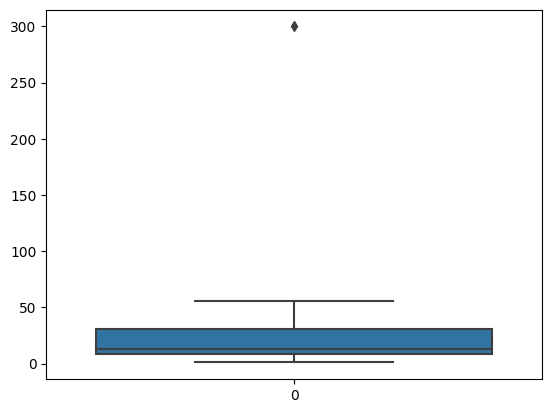

In [97]:
sns.boxplot(data=df['d1'])

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


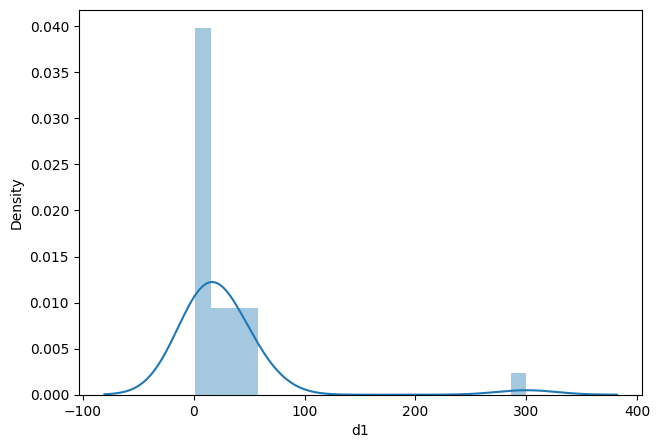

In [98]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['d1']) #Distribution plot : How data is distributed
plt.show()

In [99]:
q1 = df['d1'].quantile(0.25) #25% value
q3 = df['d1'].quantile(0.75) #75 % value
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1) #interquartile range

Q1: 8.25
Q3: 30.75
IQR: 22.5


In [100]:
outlier_lower_limit = q1 - 1.5*(q3 - q1)
outlier_upper_limit = q3 + 1.5*(q3 - q1)
print (outlier_lower_limit)
print (outlier_upper_limit)

-25.5
64.5


In [ ]:
#Anything Beyond this values treated as a outliers min(-25) and max(64.5)

### 2. Z-score

In [103]:
#function for detecting outliers in a dataset using z-score formula
outliers=[]
def detect_outliers(a):
    threshold=3    #means 3rd standard deviation
    mean=np.mean(a)
    std=np.std(a)
    
    for i in a:
        z_score= (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [104]:
detect_outliers(df['d1']) #300 is a outlier in a dataset which we can we remove or replace the values using statistical methods.

[300]

# 3. Using Quantile transformer

### This method transforms the features to follow a uniform or a normal distribution, It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [105]:
from sklearn.preprocessing import QuantileTransformer
x=df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X) #transforming and copying the data into new dataframe (below)
df_new=pd.DataFrame(X)
df_new.columns =df.columns
df_new.head()

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


,d1
0,0.000000
1,0.034483
2,0.068966
3,0.103448
4,0.137931


In [112]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])       
    plt.title('before ' + str(t).split('(')[0])   #before quantile transformation
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])      #after

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


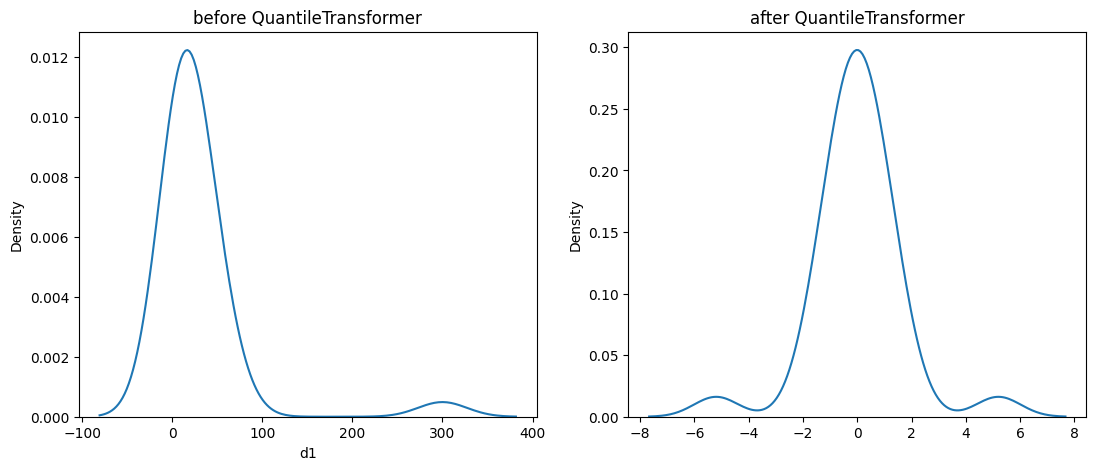

In [113]:
for col in df.columns:
    plots(df, col, QuantileTransformer(output_distribution='normal'))

<AxesSubplot:>

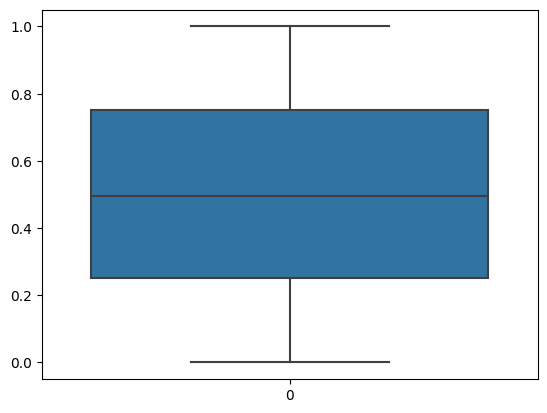

In [109]:
sns.boxplot(data=df_new["d1"]) 

# Feature Scaling

### Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

### Useful when the distribution of the data is unknown or not Gaussian , Sensitive to outliers

In [164]:
df= pd.read_csv('data-resource_2016_10_24_bangladesh-population-growth-ratio.csv')
df.head(5)

,Year,Population,Male,Female
0,1971,65733076,34058589,31674487
1,1972,66997968,34713973,32283995
2,1973,68118479,35294549,32823930
3,1974,69248216,35879905,33368311
4,1975,70542557,36550548,33992009


### 1. Normalization (MIN MAX Scaler)

In [133]:
feature_scale=[feature for feature in df.columns if feature not in ['Year']]

from sklearn.preprocessing import MinMaxScaler #applying min max scaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [145]:
scaler.transform(df[feature_scale])[1:5,:] #from 2nd row to 5th row and all columns

array([[0.01314529, 0.01314528, 0.0131453 ],
       [0.02479012, 0.02479012, 0.02479012],
       [0.03653083, 0.03653082, 0.03653083],
       [0.04998217, 0.04998216, 0.04998217]])

In [136]:
data = pd.concat([df[['Year']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1) #adding year feature too 

In [141]:
data[2:6] 

,Year,Population,Male,Female
2,1973,0.024790,0.024790,0.024790
3,1974,0.036531,0.036531,0.036531
4,1975,0.049982,0.049982,0.049982
5,1976,0.066050,0.066050,0.066050


## 2. Standard Scaler

### Standardization is another Feature scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.

# Useful when the distribution of the data is Gaussian or unknown, Less sensitive to outlier

In [153]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(df.drop("Year",axis=1))
scaled_features=std.transform(df.drop("Year",axis=1))

In [154]:
scaled_features[0:5,:]

array([[-1.55291873, -1.55291871, -1.55291876],
       [-1.51150569, -1.51150569, -1.51150568],
       [-1.47481973, -1.47481971, -1.47481975],
       [-1.43783171, -1.43783169, -1.43783173],
       [-1.39545449, -1.39545447, -1.39545451]])

In [158]:
data = pd.concat([df[['Year']].reset_index(drop=True),
                    pd.DataFrame(std.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1) #adding year feature too 

In [160]:
data.head(5)

,Year,Population,Male,Female
0,1971,-1.552919,-1.552919,-1.552919
1,1972,-1.511506,-1.511506,-1.511506
2,1973,-1.474820,-1.474820,-1.474820
3,1974,-1.437832,-1.437832,-1.437832
4,1975,-1.395454,-1.395454,-1.395455


# Feature Selection

### based on correlation

In [165]:
df.corr() #shows the positive and negative correlation

,Year,Population,Male,Female
Year,1.000000,0.998349,0.998349,0.998349
Population,0.998349,1.000000,1.000000,1.000000
Male,0.998349,1.000000,1.000000,1.000000
Female,0.998349,1.000000,1.000000,1.000000


In [173]:
data = pd.read_csv("pokemon.csv") #pokemon csv
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [175]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [179]:
data.Legendary.unique()

array([False,  True])

In [169]:
data.corr() #pokemon dataset correlation

#here we can filter out the features which have good positive or negative correlation with Legendary
#assumptions : we can select only those features which have more than 25% +ve correlation with legendary

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


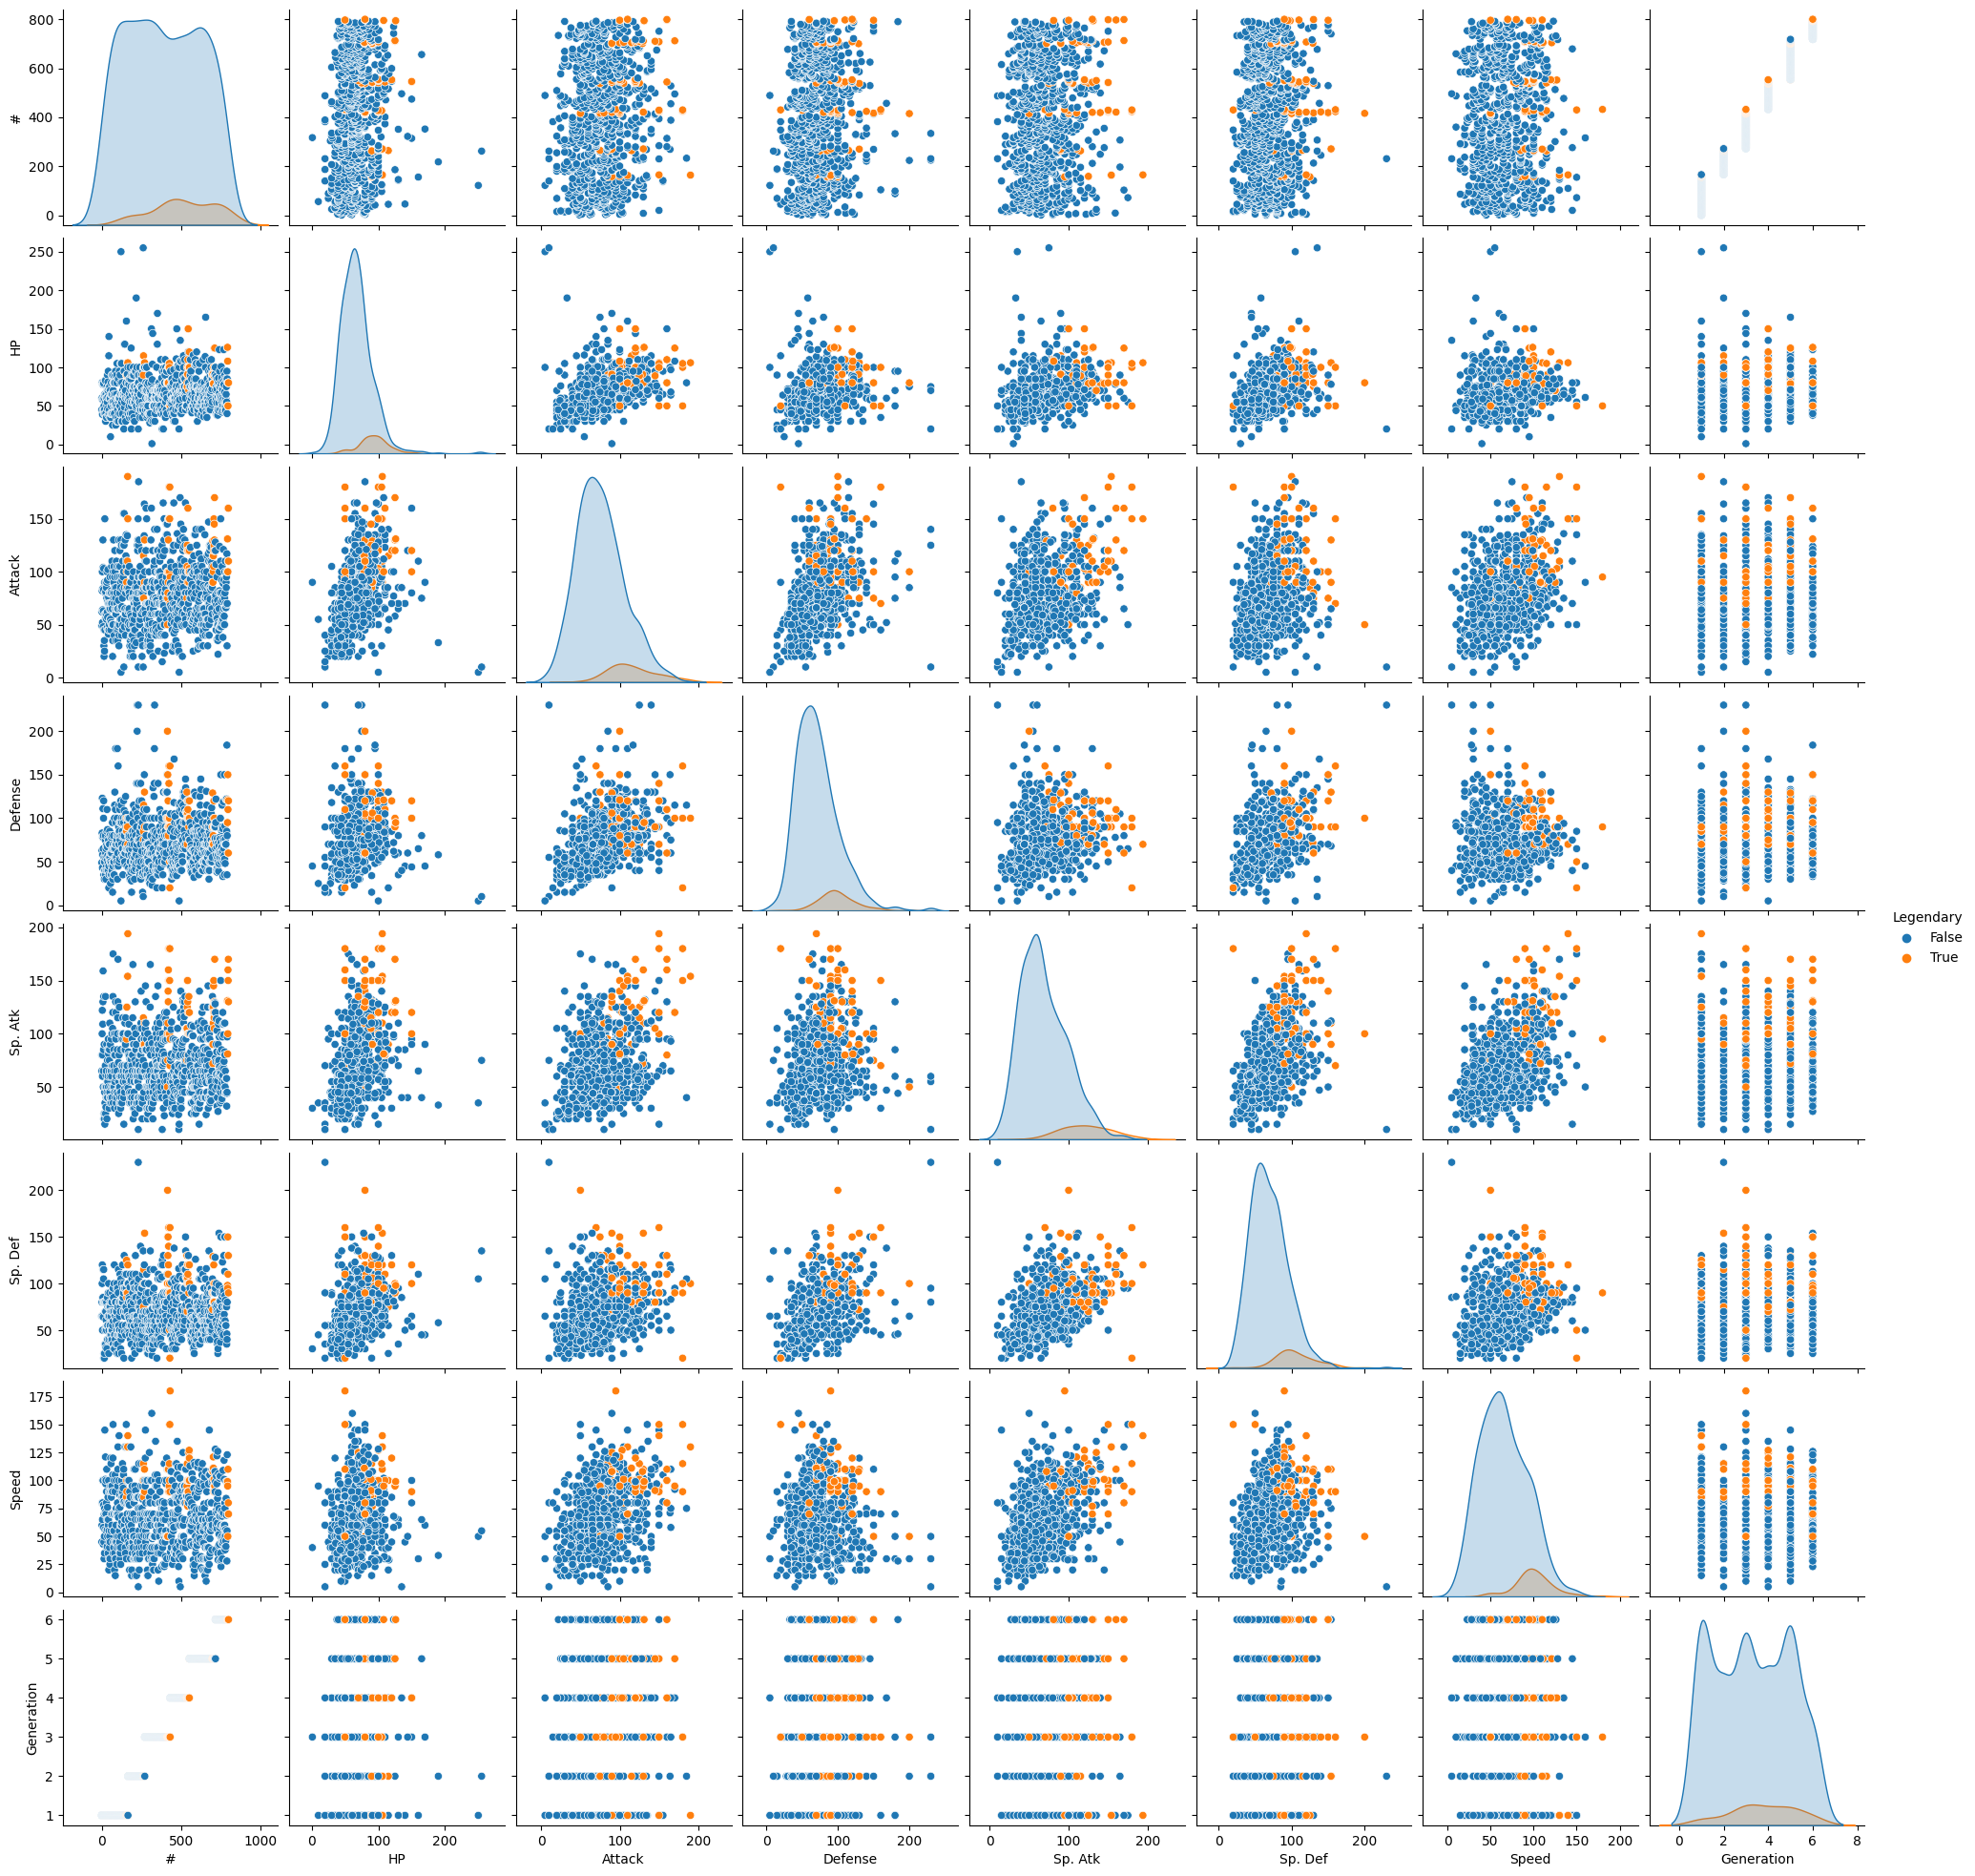

In [181]:
sns.pairplot(data=data,hue="Legendary")

# Feature extraction

In [2]:
#Pca using maths

In [3]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print("Mean of Columns")
print(M)
print()
# center columns by subtracting column means
C = A - M
print(C)
print()
print("calculate covariance matrix of centered matrix")
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print()
print(values)
print()
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
Mean of Columns
[3. 4.]

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

calculate covariance matrix of centered matrix
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

[8. 0.]

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]
